# Importing the libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Problem Statement

Some states in India are witnessing a higher dropout rate especially at the secondary level due to variety of reasons such as poverty,lack of engagement, financial obligation towards family (low-income groups). Children living in remote areas are more likely to drop out of their academics due to poor infrastructure and lack of basic amenities.Dropout rates have far reached impacts for both the individual and the society.Limited work potential,increased crime rates,strained social safety nets are all directly related to dropout population. Despite various measures, controlling dropout rate still remains a challenge due to the lack of precise data and effective policy implementation. This project seeks to address this problem by analysing school dropout data to identify sources and trends, and by proposing targeted interventions to improve the prevailing conditions. In this project we will use regression to predict the drop out rate based on location,social category,level of education(ie primary,upper primary,secondary) and gender.

# Definig the data frame

In [97]:
df = pd.read_csv('/content/drive/MyDrive/ibm_skillbuildz/dropout_data.csv')

we don't need the year coloumn so let us remove it

In [98]:
df.drop('year', axis=1, inplace=True)

Check for missing values and removing them

In [99]:
print(df.isnull().sum())

Location           2
Social Category    2
level              2
gender             2
drop out rate      2
dtype: int64


In [100]:
df.dropna(inplace=True)

# EDA & DATA CLEANING

In [101]:
print(df)

                        Location Social Category      level   gender  \
0      Andaman & Nicobar Islands         General    primary    girls   
1      Andaman & Nicobar Islands              SC    primary    girls   
2      Andaman & Nicobar Islands              ST    primary    girls   
3      Andaman & Nicobar Islands             OBC    primary    girls   
4      Andaman & Nicobar Islands         Overall    primary    girls   
...                          ...             ...        ...      ...   
13164                West Bengal              SC  secondary  overall   
13165                West Bengal              ST  secondary  overall   
13166                West Bengal             OBC  secondary  overall   
13167                West Bengal         Overall  secondary  overall   
13168                  All India         Overall  secondary  overall   

       drop out rate  
0               3.81  
1               0.00  
2               0.00  
3               0.00  
4               1.06

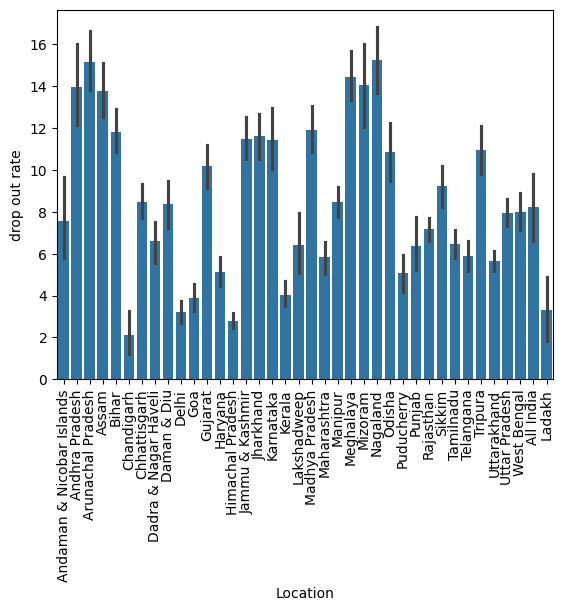

In [102]:
sns.barplot(x='Location', y='drop out rate', data=df)
plt.xticks(rotation=90)
plt.show()

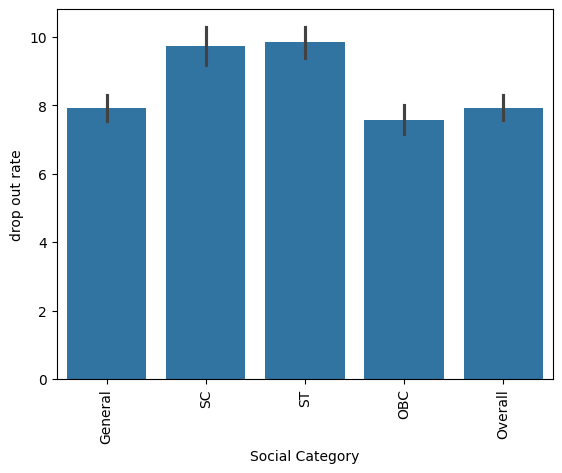

In [103]:
sns.barplot(x='Social Category', y='drop out rate', data=df)
plt.xticks(rotation=90)
plt.show()

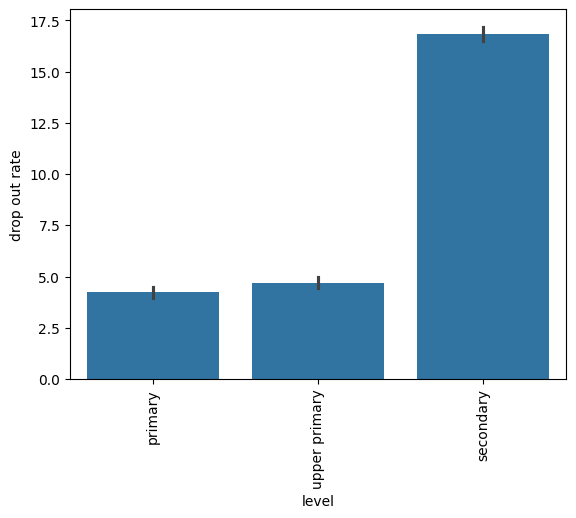

In [104]:
sns.barplot(x='level', y='drop out rate', data=df)
plt.xticks(rotation=90)
plt.show()

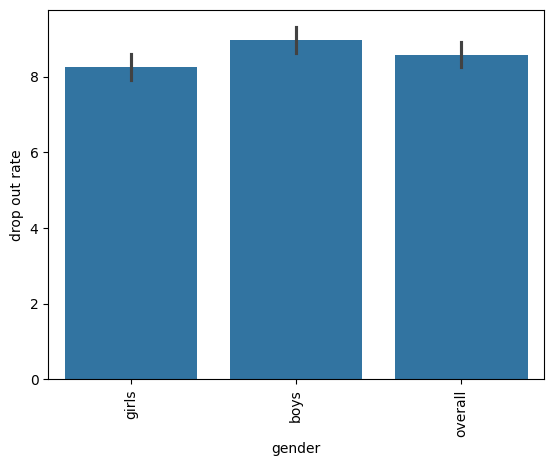

In [105]:
sns.barplot(x='gender', y='drop out rate', data=df)
plt.xticks(rotation=90)
plt.show()

Encoding the categorical values into binary values

In [106]:
label_encoders = {}
for column in ['Location', 'Social Category', 'level', 'gender']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

mapping between original values and encoded values

In [107]:
for column in ['Location', 'Social Category', 'level', 'gender']:
    print(f"Encoded values for {column}:")
    for i, item in enumerate(label_encoders[column].classes_):
        print(f"{item} :{i}")
    print("------")
    print("------")

Encoded values for Location:
All India :0
Andaman & Nicobar Islands :1
Andhra Pradesh :2
Arunachal Pradesh :3
Assam :4
Bihar :5
Chandigarh :6
Chhattisgarh :7
Dadra & Nagar Haveli :8
Daman & Diu :9
Delhi :10
Goa :11
Gujarat :12
Haryana :13
Himachal Pradesh :14
Jammu & Kashmir :15
Jharkhand :16
Karnataka :17
Kerala :18
Ladakh :19
Lakshadweep :20
Madhya Pradesh :21
Maharashtra :22
Manipur :23
Meghalaya :24
Mizoram :25
Nagaland :26
Odisha :27
Puducherry :28
Punjab :29
Rajasthan :30
Sikkim :31
Tamilnadu :32
Telangana :33
Tripura :34
Uttar Pradesh :35
Uttarakhand :36
West Bengal :37
------
------
Encoded values for Social Category:
General :0
OBC :1
Overall :2
SC :3
ST :4
------
------
Encoded values for level:
primary :0
secondary :1
upper primary :2
------
------
Encoded values for gender:
boys :0
girls :1
overall :2
------
------


<Axes: >

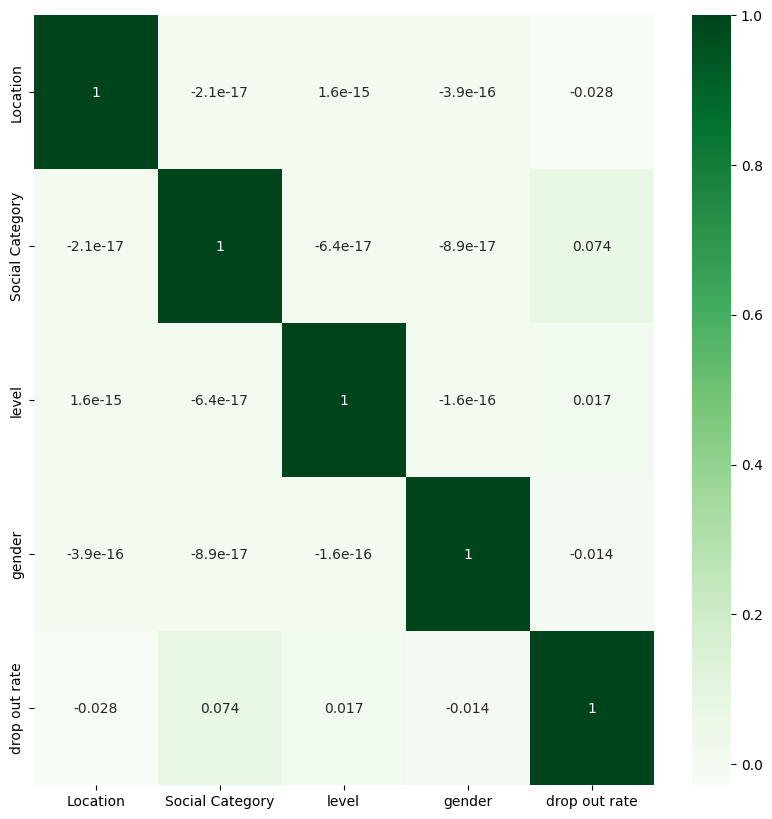

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap='Greens')

dataframe after encoding

In [109]:
print(df)

       Location  Social Category  level  gender  drop out rate
0             1                0      0       1           3.81
1             1                3      0       1           0.00
2             1                4      0       1           0.00
3             1                1      0       1           0.00
4             1                2      0       1           1.06
...         ...              ...    ...     ...            ...
13164        37                3      1       2          18.75
13165        37                4      1       2          21.64
13166        37                1      1       2          13.31
13167        37                2      1       2          13.83
13168         0                2      1       2          16.09

[13167 rows x 5 columns]


# Splitting the data set

Define the features (X) and target (y)

In [110]:
X = df.drop('drop out rate', axis=1)
y = df['drop out rate']

Split the data into training and testing sets


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Choosing the model

In [112]:
# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),

}

# Function to evaluate multiple regression models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on the test set
        mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
        r2 = r2_score(y_test, y_pred)  # Calculate R^2 score

        results[name] = {'MSE': mse, 'R^2': r2}
        print(f"{name}: MSE = {mse}, R^2 = {r2}")
        print("------")
    return results

evaluating the models

In [113]:
results = evaluate_models(X_train, X_test, y_train, y_test)
best_model_name = max(results, key=lambda x: results[x]['R^2'])
best_model = models[best_model_name]

print(f"Best model: {best_model_name} with R^2 = {results[best_model_name]['R^2']} and MSE = {results[best_model_name]['MSE']}")

Linear Regression: MSE = 127.85977638634357, R^2 = 0.011769104740268821
------
Ridge Regression: MSE = 127.8598121479379, R^2 = 0.011768828338155624
------
Lasso Regression: MSE = 129.1910128017405, R^2 = 0.0014799505451689177
------
Decision Tree: MSE = 79.3850573085114, R^2 = 0.38643122589869905
------
Random Forest: MSE = 78.6935729119015, R^2 = 0.39177572331323485
------
Gradient Boosting: MSE = 83.06648026806442, R^2 = 0.35797743057720666
------
Support Vector Regression: MSE = 145.6442704661936, R^2 = -0.125687623270627
------
Best model: Random Forest with R^2 = 0.39177572331323485 and MSE = 78.6935729119015


#Retraining the model with complete data

In [114]:
best_model.fit(X, y)

RandomForestRegressor()

#Prediction

In [115]:
new_data = pd.DataFrame({
    'Location': ['NewLocation'],  # Example value; replace with actual data
    'Social Category': ['NewCategory'],  # Example value; replace with actual data
    'level': ['NewLevel'],  # Example value; replace with actual data
    'gender': ['NewGender'],  # Example value; replace with actual data
    # Add other features as needed
})

# Encode new data using the same encoders
for column in new_data.columns:
    # Handle unseen labels
    new_data[column] = new_data[column].apply(lambda x: label_encoders[column].classes_[0]
                                               if x not in label_encoders[column].classes_
                                               else x)
    new_data[column] = label_encoders[column].transform(new_data[column])
print(new_data)
print('----------' )
# Predict dropout rate
predicted_dropout_rate = best_model.predict(new_data)
print(f"Predicted Dropout Rate: {predicted_dropout_rate[0]}")

   Location  Social Category  level  gender
0         0                0      0       0
----------
Predicted Dropout Rate: 3.562051712315462
